# Startup Success Classification using Machine Learning

The given task is a classification problem with both numerical and categorical features

In [195]:
#Importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)

In [35]:
#Loading the dataset
dataset = pd.read_csv('./data.csv',  encoding="latin1")

In [198]:
dataset.shape

(472, 115)

In [39]:
#Vieweing a sample of the dataset
dataset.head()

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,Employees count MoM change,Has the team size grown,Est. Founding Date,Last Funding Date,Last Funding Amount,Country of company,Continent of company,Number of Investors in Seed,Number of Investors in Angel and or VC,Number of Co-founders,Number of of advisors,Team size Senior leadership,Team size all employees,Presence of a top angel or venture fund in previous round of investment,Number of of repeat investors,Number of Sales Support material,Worked in top companies,Average size of companies worked for in the past,Have been part of startups in the past?,Have been part of successful startups in the past?,Was he or she partner in Big 5 consulting?,Consulting experience?,Product or service company?,Catering to product/service across verticals,Focus on private or public data?,Focus on consumer data?,Focus on structured or unstructured data,Subscription based business,Cloud or platform based serive/product?,Local or global player,Linear or Non-linear business model,"Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive",Number of of Partners of company,Crowdsourcing based business,Crowdfunding based business,Machine Learning based business,Predictive Analytics business,Speech analytics business,Prescriptive analytics business,Big Data Business,Cross-Channel Analytics/ marketing channels,Owns data or not? (monetization of data) e.g. Factual,Is the company an aggregator/market place? e.g. Bluekai,Online or offline venture - physical location based business or online venture?,B2C or B2B venture?,Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about?,Average Years of experience for founder and co founder,Exposure across the globe,Breadth of experience across verticals,Highest education,Years of education,Specialization of highest education,Relevance of education to venture,Relevance of experience to venture,Degree from a Tier 1 or Tier 2 university?,Renowned in professional circle,Experience in selling and building products,Experience in Fortune 100 organizations,Experience in Fortune 500 organizations,Experience in Fortune 1000 organizations,Top management similarity,Number of Recognitions for Founders and Co-founders,Number of of Research publications,Skills score,Team Composition score,Dificulty of Obtaining Work force,Pricing Strategy,Hyper localisation,Time to market service or product,Employee benefits and salary structures,Long term relationship with other founders,Proprietary or patent position (competitive position),Barriers of entry for the competitors,Company awards,Controversial history of founder or co founder,Legal risk and intellectual property,Client Reputation,google page rank of company website,Technical proficiencies to analyse and interpret unstructured data,Solutions offered,Invested through global incubation competitions?,Industry trend in investing,Disruptiveness of technology,Number of Direct competitors,Employees per year of company existence,Last round of funding received (in milionUSD),"Survival through recession, based on existence of the company through recession times",Time to 1st investment (in months),"Avg time to investment - average across all rounds, measured from previous investment",Gartner hype cycle stage,Time to maturity of technology (in years),Percent_skill_Entrepreneurship,Percent_skill_Operations,Percent_skill_Engineering,Percent_skill_Marketing,Percent_skill_Leadership,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,Success,No Info,No Info,-1.0,Video di

In [43]:
dataset.set_index('Company_Name',inplace=True) 

### Steps to follow:
1. Check for Missing Data
2. Analyze Numeric Columns
3. Plot Numerical Distributions
4. Analyze Categorical Columns
5. Assess Category Counts (Cardinality)
6. Identify Outliers
7. Correlate Features with Success

In [45]:
dataset.nunique()

Dependent-Company Status                  2
year of founding                         16
Age of company in years                  16
Internet Activity Score                 260
Short Description of company profile    313
                                       ... 
Percent_skill_Law                        10
Percent_skill_Consulting                 24
Percent_skill_Finance                    30
Percent_skill_Investment                 37
Renown score                             13
Length: 115, dtype: int64

### Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!

In [202]:
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean()*100, 4),  ' % missing values')

Age of company in years 9.322  % missing values
Internet Activity Score 13.7712  % missing values
Short Description of company profile 31.5678  % missing values
Industry of company 26.2712  % missing values
Focus functions of company 6.3559  % missing values
Investors 29.661  % missing values
Employee Count 35.1695  % missing values
Employees count MoM change 43.4322  % missing values
Has the team size grown 10.5932  % missing values
Est. Founding Date 23.0932  % missing values
Last Funding Date 25.8475  % missing values
Last Funding Amount 33.8983  % missing values
Country of company 15.0424  % missing values
Continent of company 15.0424  % missing values
Number of  of Partners of company 60.1695  % missing values
Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about? 9.1102  % missing values
Specialization of highest education 20.5508  % missing values
Degree from a Tier 1 or Tier 2 university? 30.5085  % missing values
Ex

<Axes: ylabel='Company_Name'>

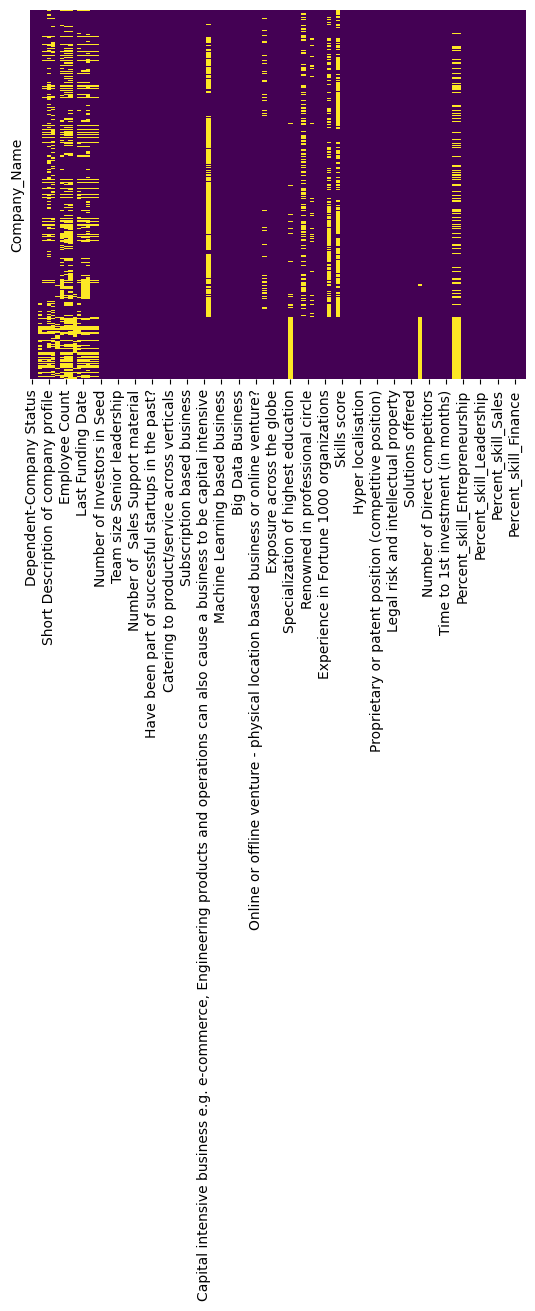

In [49]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We can infer that fields such as
* Internet Activity Score - Important for this analysis
* Investors - Investor detail is not so important
* Est. Founding Date - Not sure if it is founding date or Funding date, so cannot conclude
* Years of education - Though it contains some missing values, it is very least
* Disruptiveness of technology - Contains least missing values
* Time to maturity of Technology - Since it is a Startup, we can roughly impute the missing values with mean years

### Plotting Correlation matrix to view missing values using Missingno Library

In [59]:
!pip install missingno

In [61]:
import missingno as msno
%matplotlib inline

<Axes: >

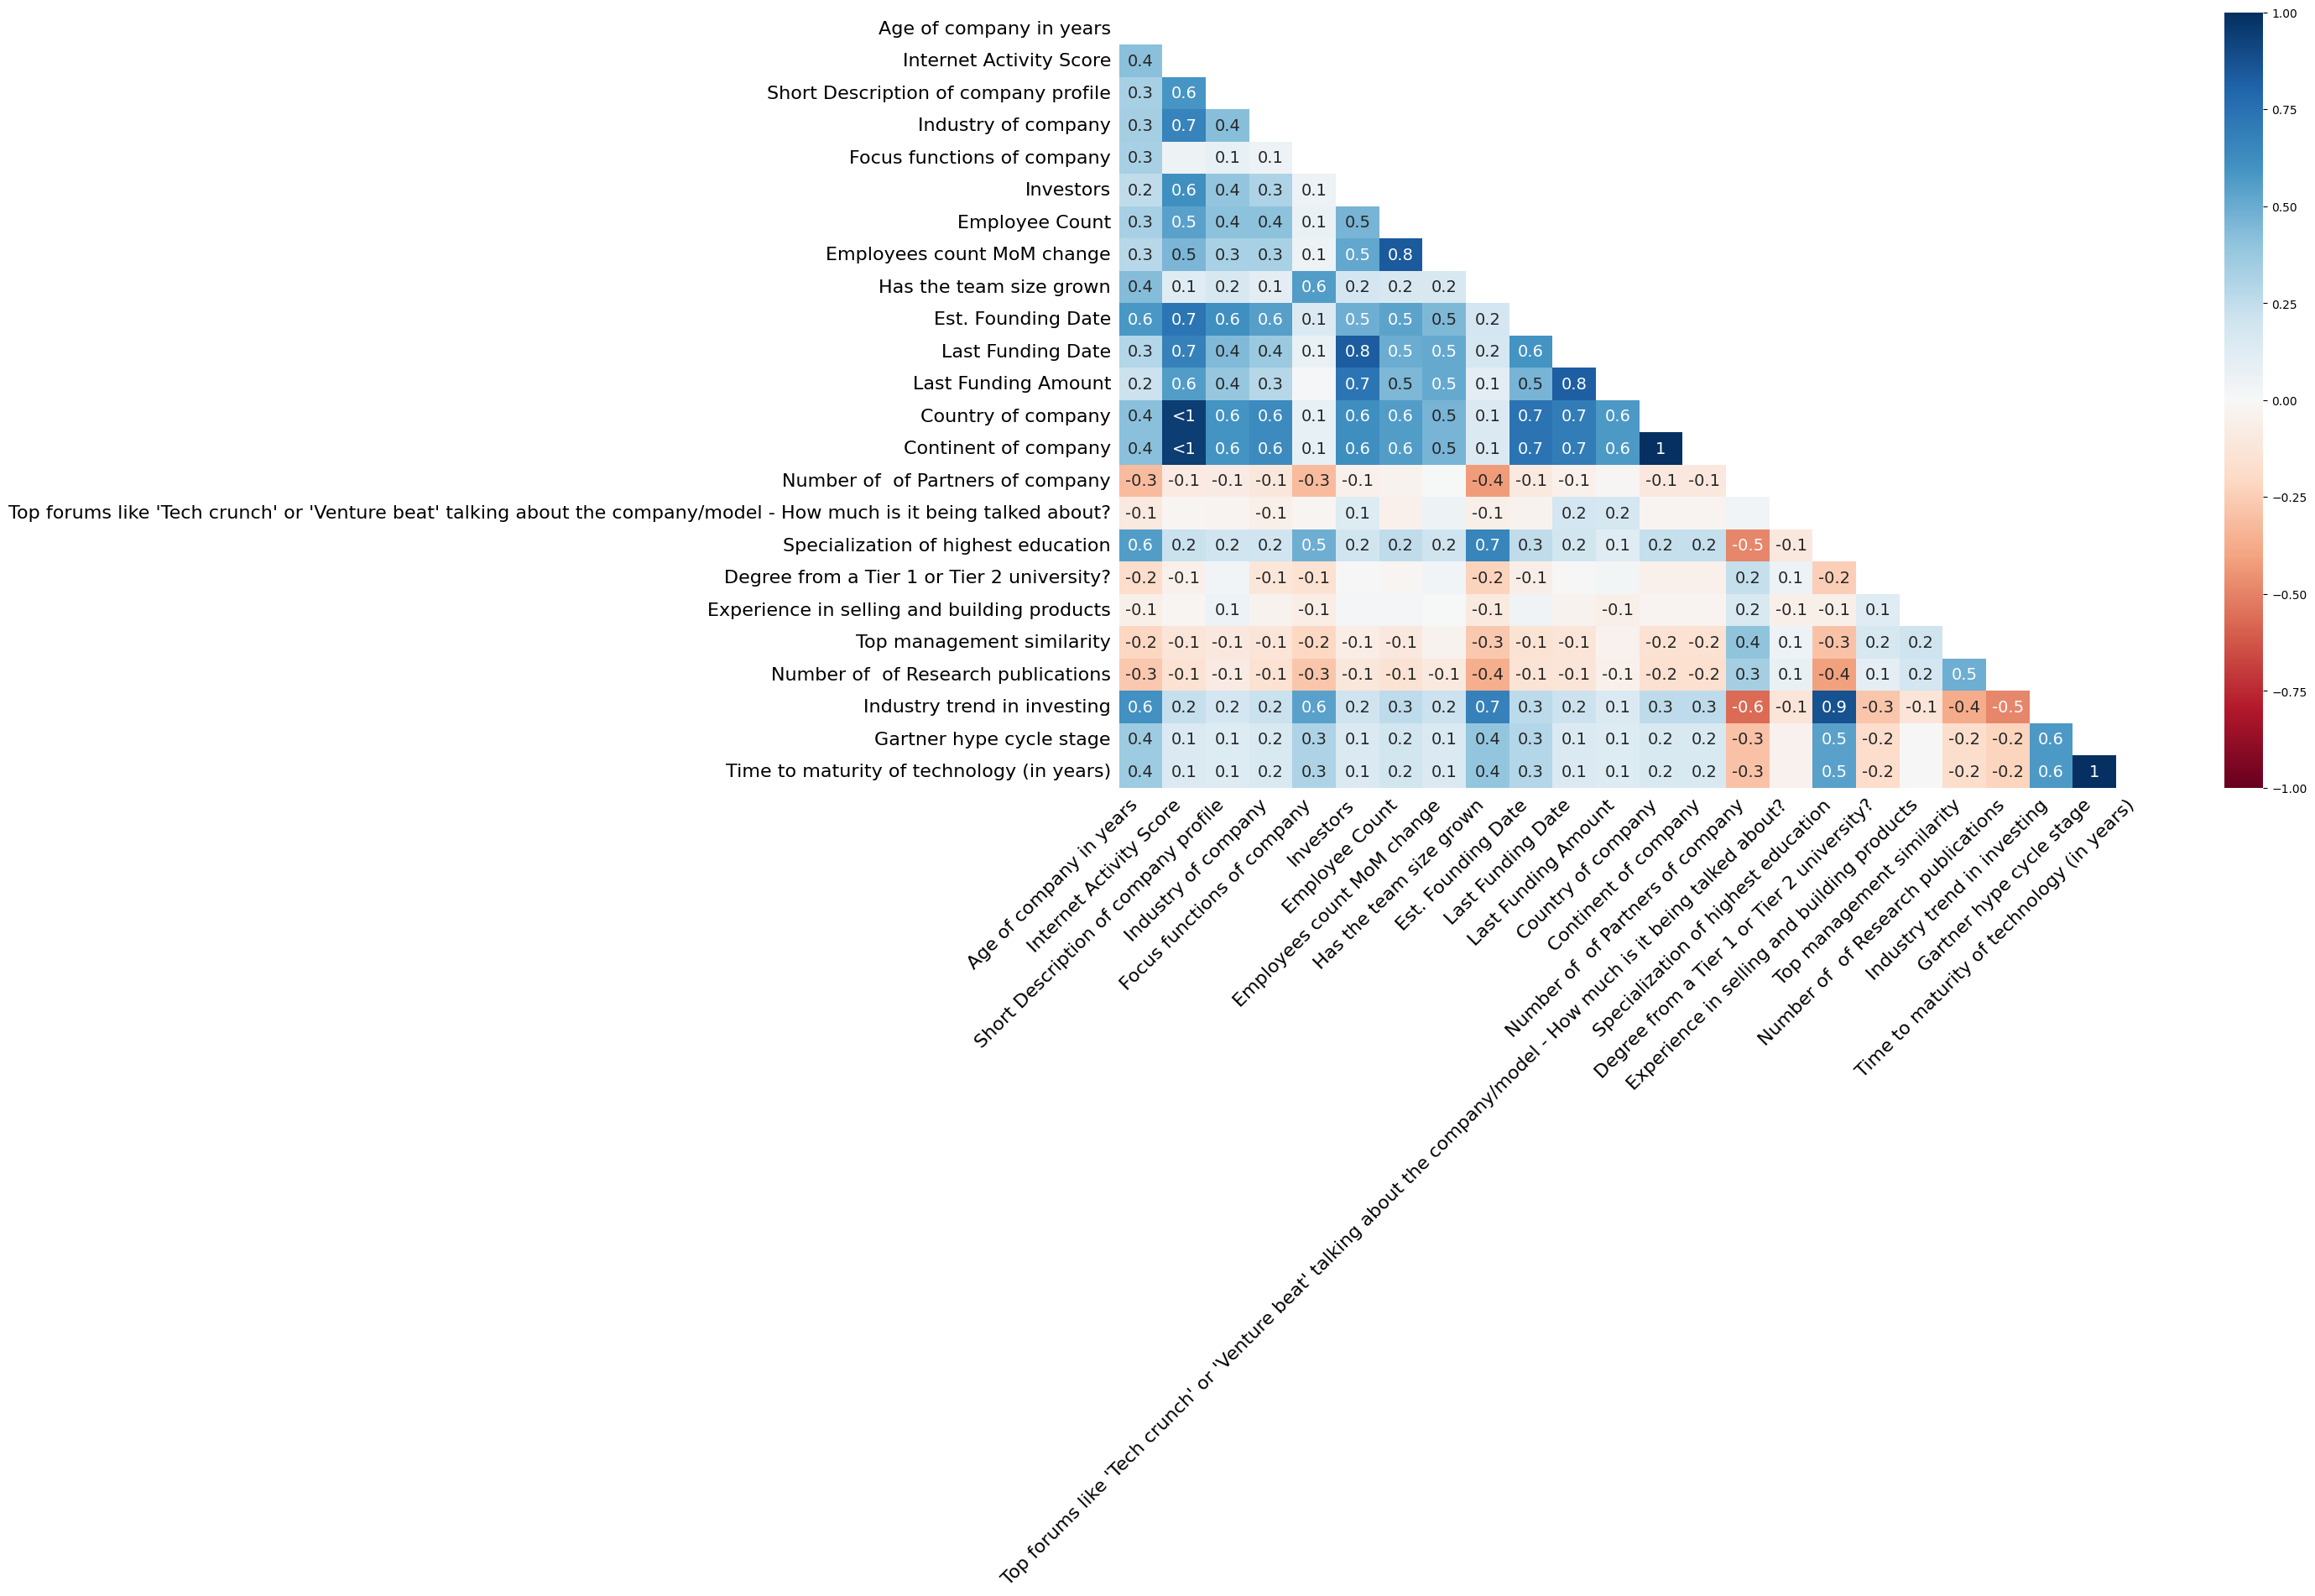

In [63]:
msno.heatmap(dataset)

We can see that there exists more missing values for colors in dark blue for correlations.

<Axes: xlabel='Dependent-Company Status', ylabel='count'>

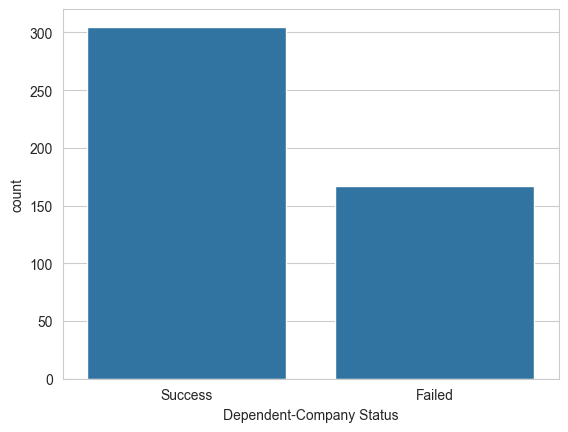

In [65]:
sns.set_style('whitegrid')
sns.countplot(x='Dependent-Company Status',data=dataset)

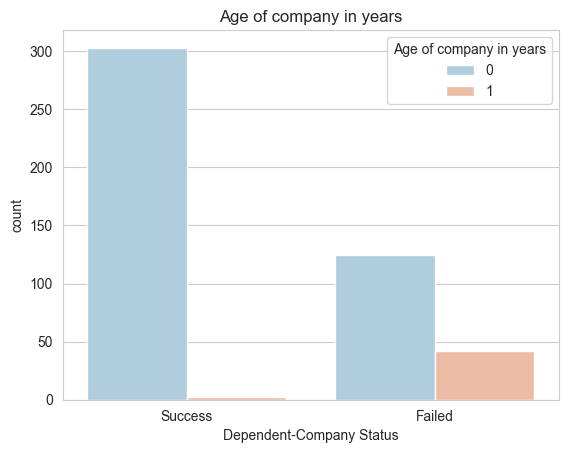

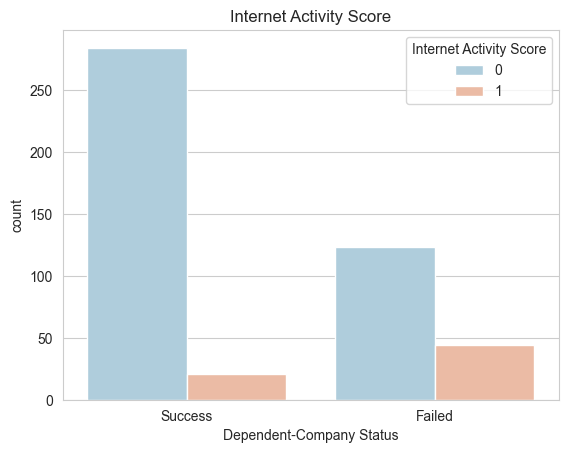

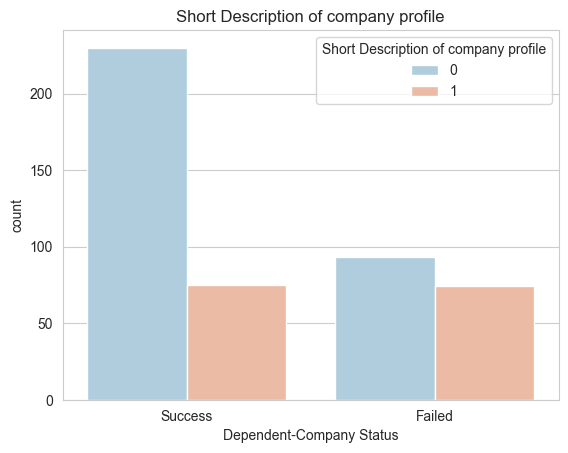

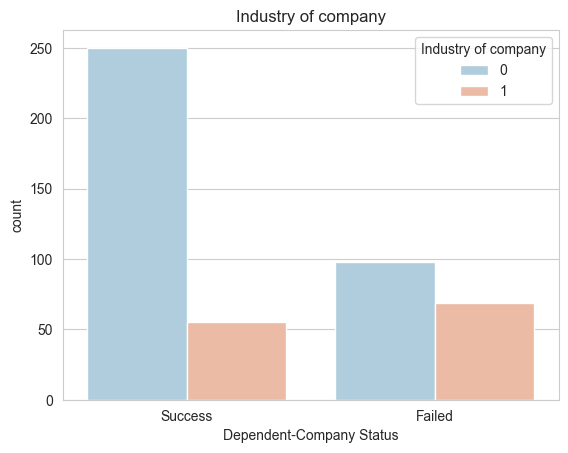

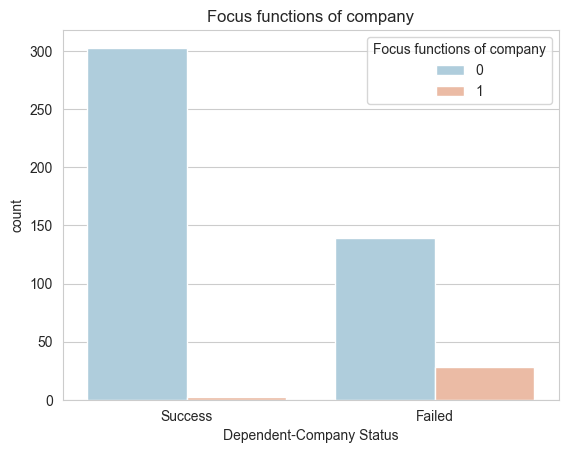

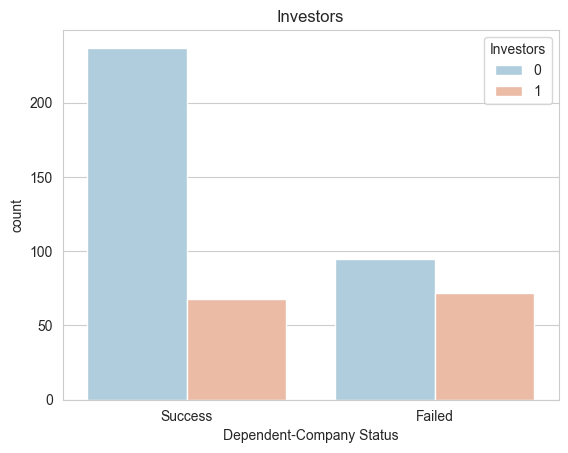

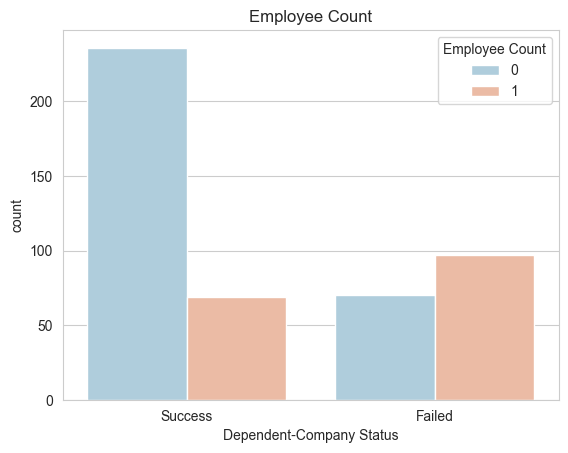

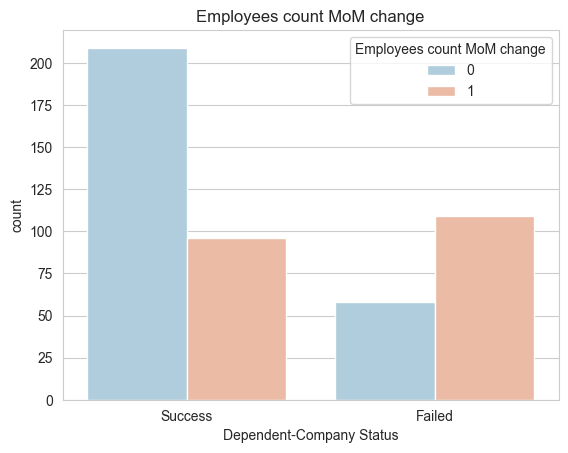

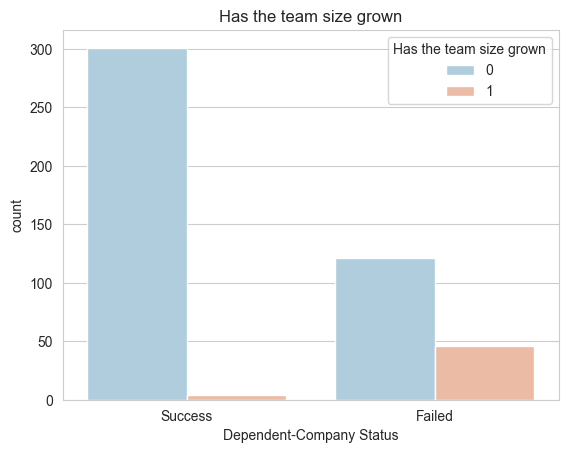

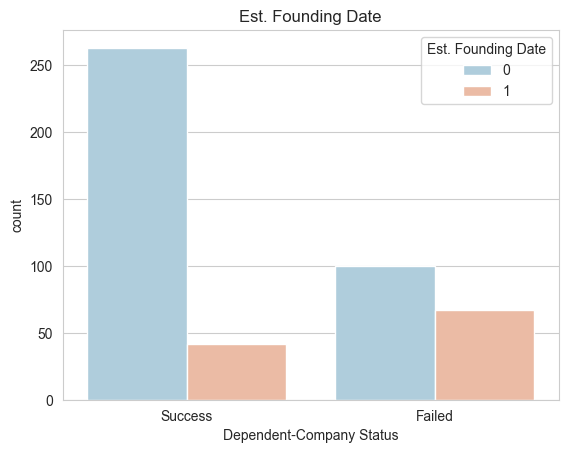

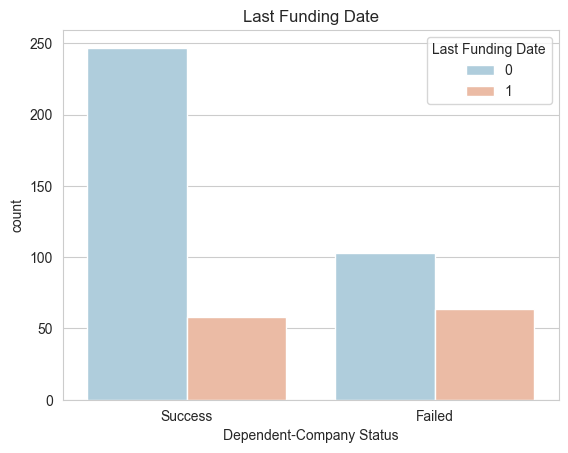

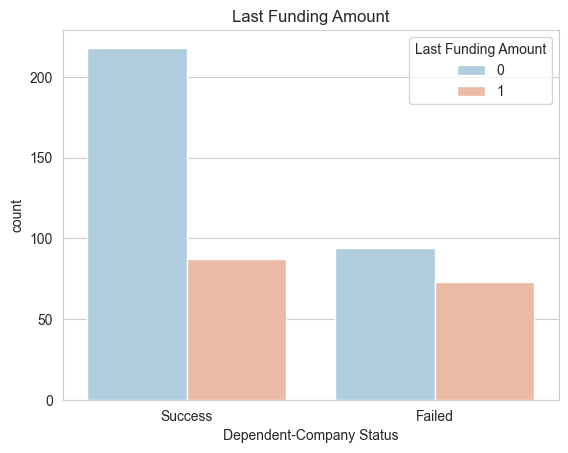

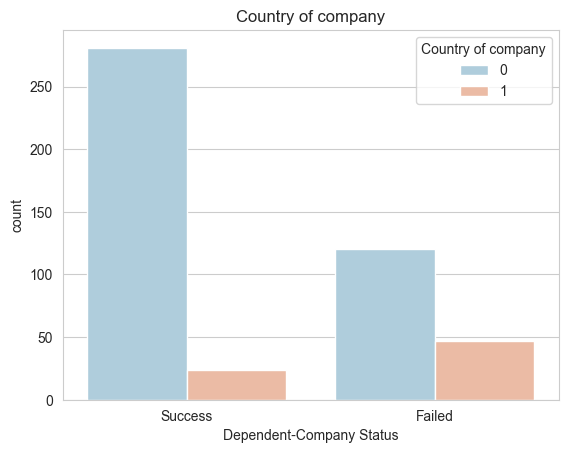

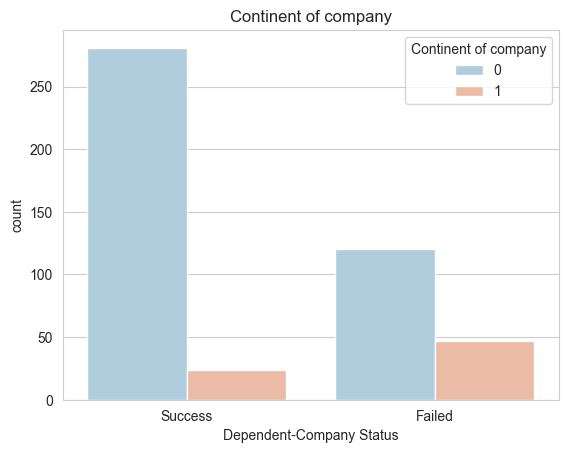

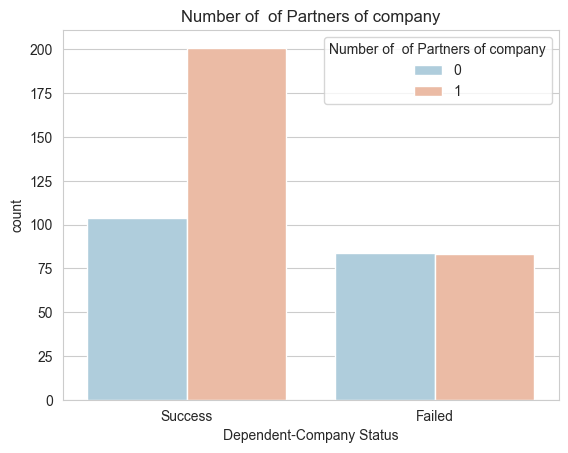

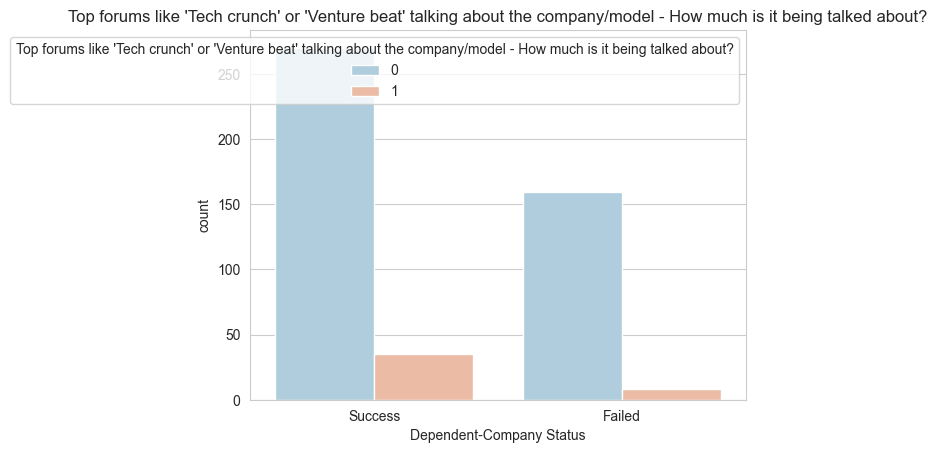

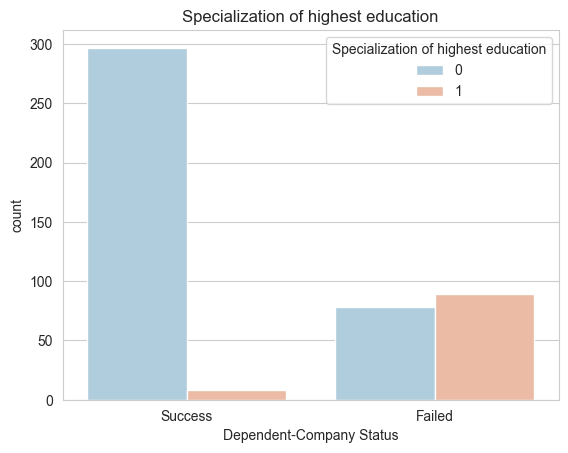

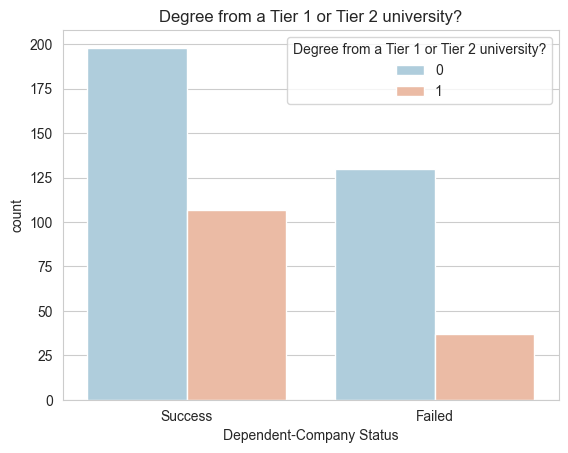

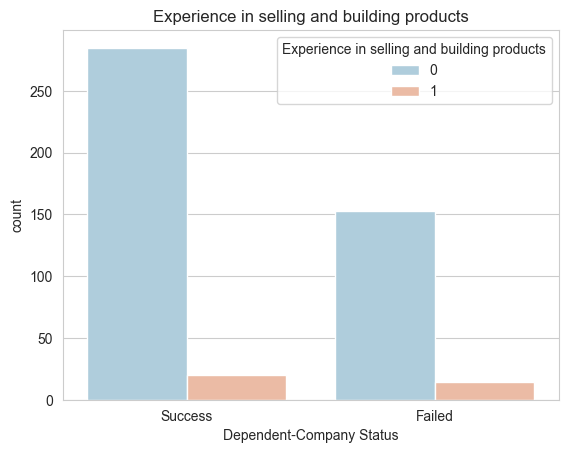

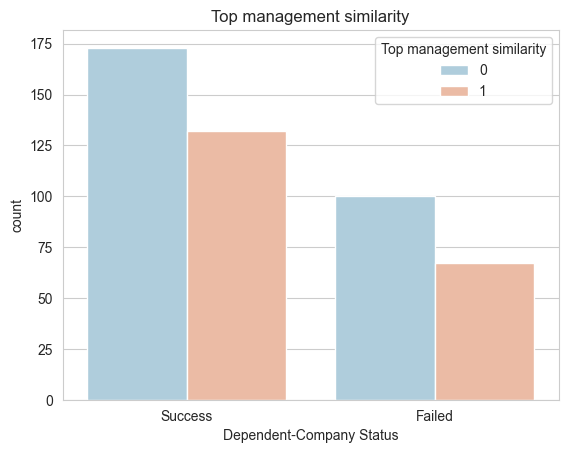

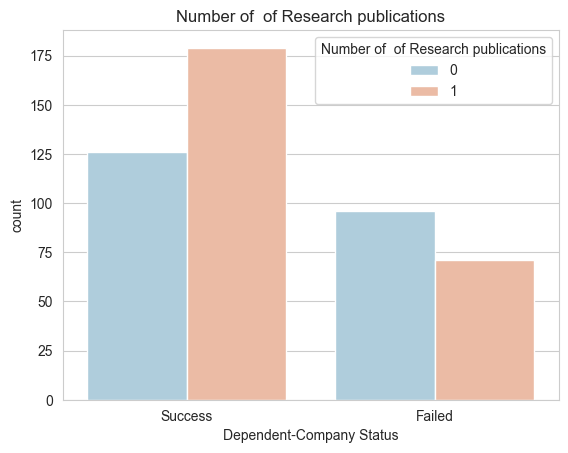

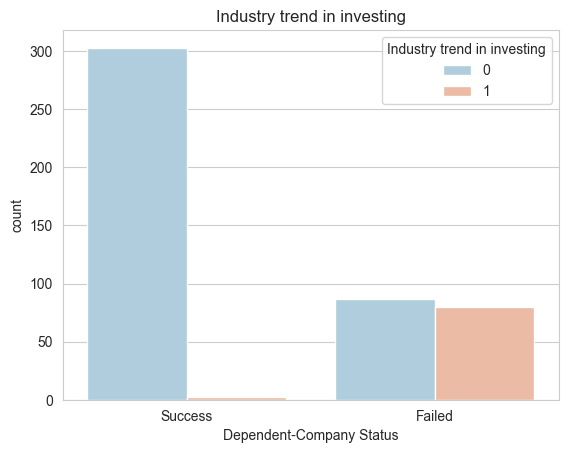

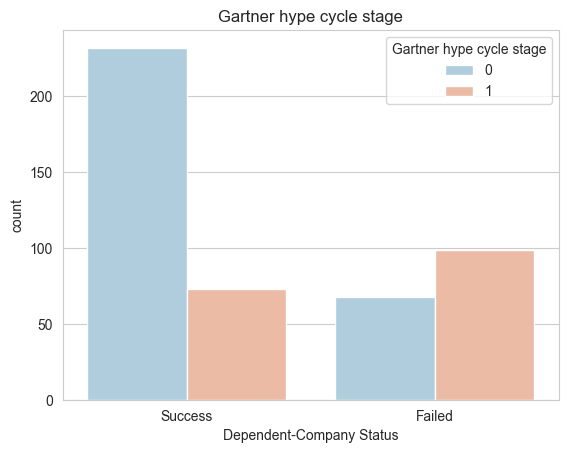

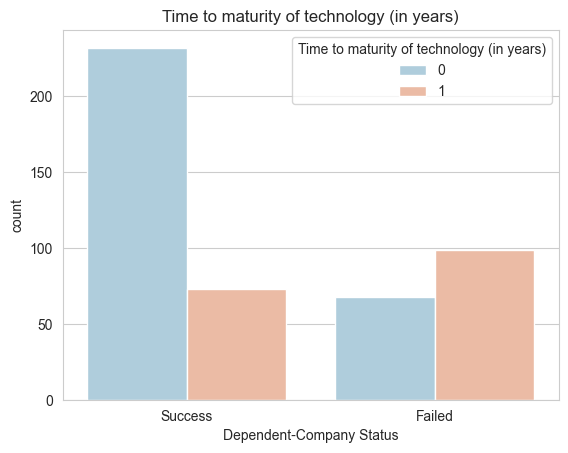

In [67]:
sns.set_style('whitegrid')
for feature in features_with_na:
    data = dataset.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    

    sns.countplot(x='Dependent-Company Status',hue=data[feature],data=dataset,palette='RdBu_r')
    plt.title(feature)
    plt.show()

In [69]:
#Drop Features that contain more missing values
data_new = dataset.drop(['Employees count MoM change', 
                 'Gartner hype cycle stage', 
                 'Time to maturity of technology (in years)',
                 'Employee Count', 'Last Funding Amount',
                 'Short Description of company profile', 'Investors', 'Industry of company',
                 'Last Funding Date', 'Est. Founding Date', 'Specialization of highest education'  ], axis = 1)

In [71]:
data_new =  data_new.fillna(0)
data_new

,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Focus functions of company,Has the team size grown,Country of company,Continent of company,Number of Investors in Seed,Number of Investors in Angel and or VC,Number of Co-founders,Number of of advisors,Team size Senior leadership,Team size all employees,Presence of a top angel or venture fund in previous round of investment,Number of of repeat investors,Number of Sales Support material,Worked in top companies,Average size of companies worked for in the past,Have been part of startups in the past?,Have been part of successful startups in the past?,Was he or she partner in Big 5 consulting?,Consulting experience?,Product or service company?,Catering to product/service across verticals,Focus on private or public data?,Focus on consumer data?,Focus on structured or unstructured data,Subscription based business,Cloud or platform based serive/product?,Local or global player,Linear or Non-linear business model,"Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive",Number of of Partners of company,Crowdsourcing based business,Crowdfunding based business,Machine Learning based business,Predictive Analytics business,Speech analytics business,Prescriptive analytics business,Big Data Business,Cross-Channel Analytics/ marketing channels,Owns data or not? (monetization of data) e.g. Factual,Is the company an aggregator/market place? e.g. Bluekai,Online or offline venture - physical location based business or online venture?,B2C or B2B venture?,Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about?,Average Years of experience for founder and co founder,Exposure across the globe,Breadth of experience across verticals,Highest education,Years of education,Relevance of education to venture,Relevance of experience to venture,Degree from a Tier 1 or Tier 2 university?,Renowned in professional circle,Experience in selling and building products,Experience in Fortune 100 organizations,Experience in Fortune 500 organizations,Experience in Fortune 1000 organizations,Top management similarity,Number of Recognitions for Founders and Co-founders,Number of of Research publications,Skills score,Team Composition score,Dificulty of Obtaining Work force,Pricing Strategy,Hyper localisation,Time to market service or product,Employee benefits and salary structures,Long term relationship with other founders,Proprietary or patent position (competitive position),Barriers of entry for the competitors,Company awards,Controversial history of founder or co founder,Legal risk and intellectual property,Client Reputation,google page rank of company website,Technical proficiencies to analyse and interpret unstructured data,Solutions offered,Invested through global incubation competitions?,Industry trend in investing,Disruptiveness of technology,Number of Direct competitors,Employees per year of company existence,Last round of funding received (in milionUSD),"Survival through recession, based on existence of the company through recession times",Time to 1st investment (in months),"Avg time to investment - average across all rounds, measured from previous investment",Percent_skill_Entrepreneurship,Percent_skill_Operations,Percent_skill_Engineering,Percent_skill_Marketing,Percent_skill_Leadership,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
Company_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Company1,Success,No Info,No Info,-1.0,operation,No,United States,North America,2,0,1,2,2,15,Yes,4,Nothing,No,Small,No,No,No,No,Service,No,Private,No,Both,Yes,Platform,Global,Linear,Yes,0,No,No,No,No,No,No,No,No,No

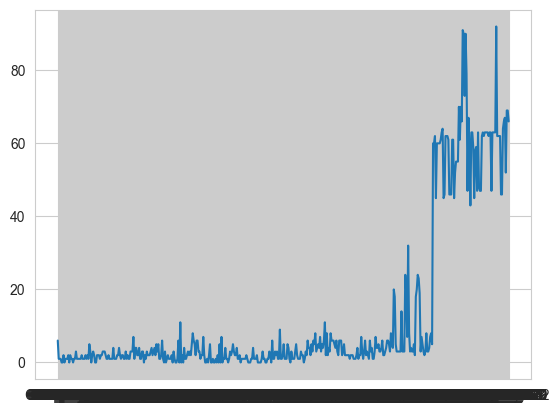

In [73]:
noinfo = (dataset == 'No Info').sum(axis=1)
plt.plot(noinfo)

In [75]:
#Cheking for index and filling unassigned values
data_new = data_new.replace('No Info', 0)
data_new = data_new.replace('None', 0)
data_new = data_new.replace('Yes', 1)
data_new = data_new.replace('No', 0)
data_new = data_new.replace('yes', 1)
data_new = data_new.replace('YES', 1)
data_new = data_new.replace('no', 0)
data_new = data_new.replace('NaN', 0)
data_new = data_new.replace('Not Applicable', 0)


<Axes: ylabel='Company_Name'>

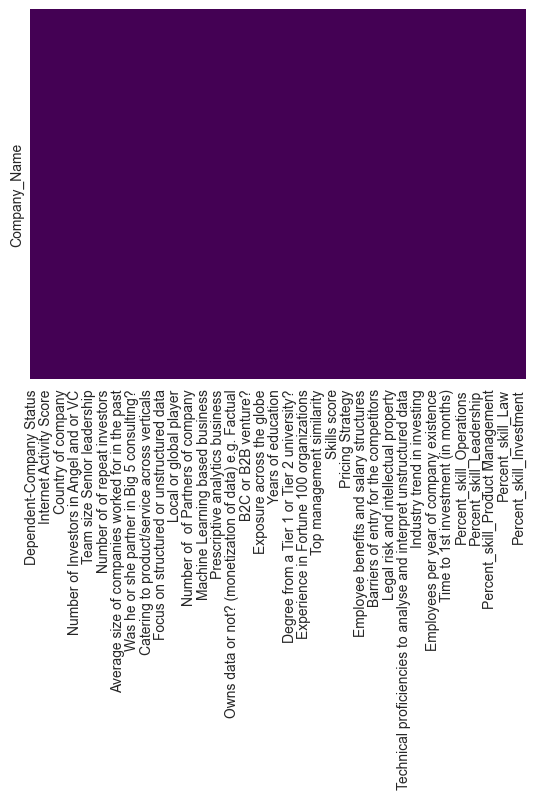

In [77]:
#Checking for Null values again
sns.heatmap(data_new.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Analysing Numerical Features

In [79]:
data_new['success_fail'] =  data_new['Dependent-Company Status'].map({'Success': 1, 'Failed': 0})
data_new['success_fail']

Company_Name
Company1      1
Company2      1
Company3      1
Company4      1
Company5      1
             ..
Company468    0
Company469    0
Company470    0
Company471    0
Company472    0
Name: success_fail, Length: 472, dtype: int64

In [81]:
#Create seperate dataframe for numerical variables
integers = data_new.select_dtypes(exclude = 'object')
y =  integers['success_fail']

<Axes: xlabel='success_fail', ylabel='Industry trend in investing'>

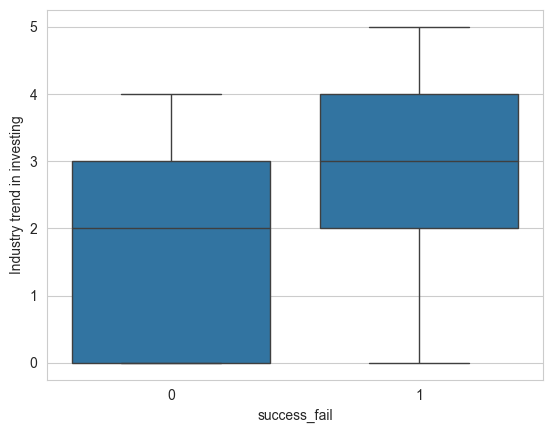

In [85]:
sns.boxplot(y = 'Industry trend in investing', x = 'success_fail', data= data_new)

<Axes: xlabel='Industry trend in investing', ylabel='Exposure across the globe'>

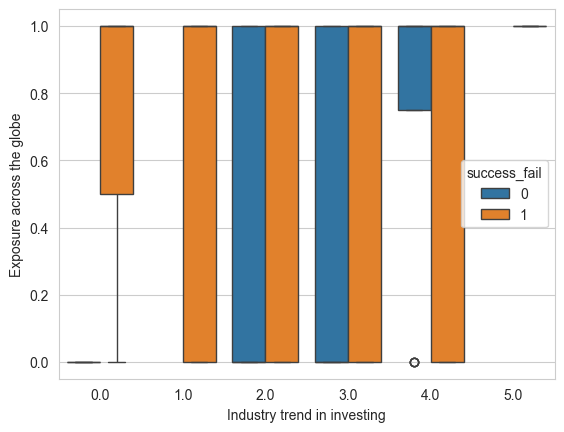

In [87]:
sns.boxplot(x = 'Industry trend in investing', y = 'Exposure across the globe', hue = 'success_fail', data= data_new)

/var/folders/97/d1vfnss15l5gvpjytz0w0hfw0000gn/T/ipykernel_4546/944953595.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_new['Industry trend in investing'])


<Axes: xlabel='Industry trend in investing', ylabel='Density'>

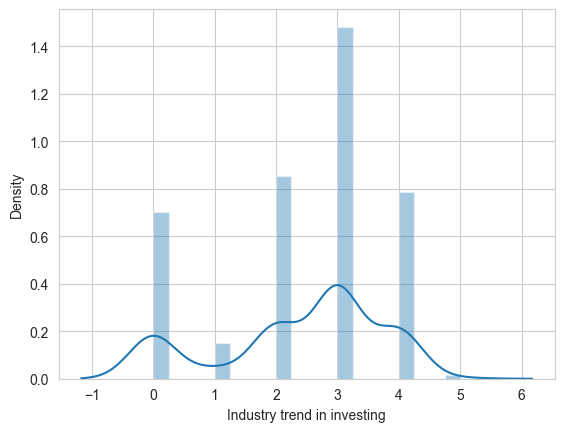

In [89]:
sns.distplot(data_new['Industry trend in investing'])

<Axes: xlabel='Highest education', ylabel='count'>

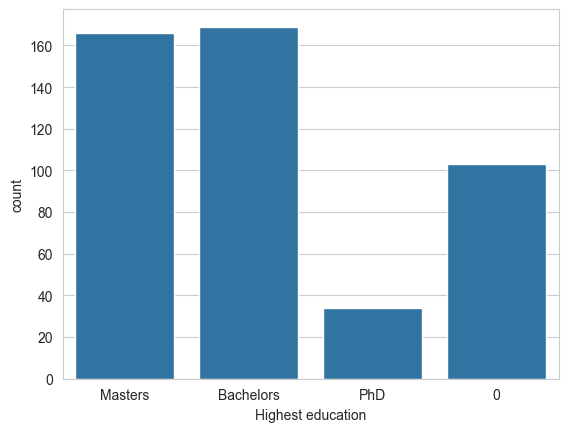

In [91]:
sns.countplot(x= data_new['Highest education'])

<Axes: xlabel='success_fail', ylabel='Internet Activity Score'>

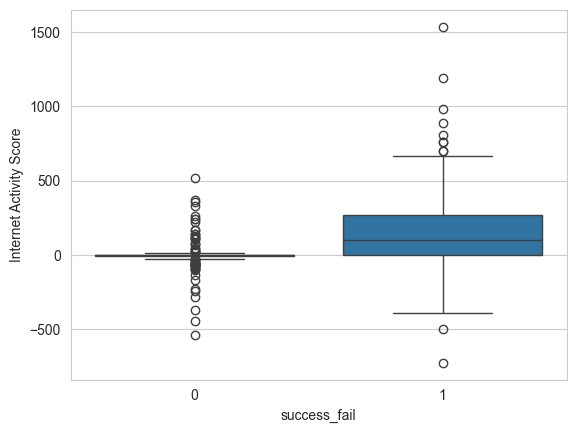

In [93]:
sns.boxplot(y = 'Internet Activity Score', x = 'success_fail', data= data_new)

<AxesSubplot:xlabel='success_fail', ylabel='Internet Activity Score'>

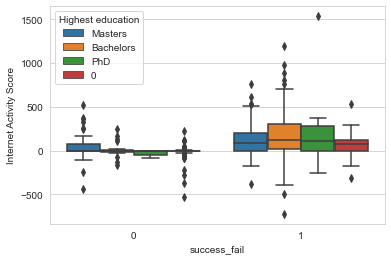

In [27]:
sns.boxplot(y = 'Internet Activity Score', x = 'success_fail', hue = 'Highest education', data= data_new)

In [95]:
#Correletion matrix of numerical variables
cor =  integers.corr()
cor

,Internet Activity Score,Has the team size grown,Number of Co-founders,Number of of advisors,Team size Senior leadership,Presence of a top angel or venture fund in previous round of investment,Worked in top companies,Have been part of startups in the past?,Have been part of successful startups in the past?,Was he or she partner in Big 5 consulting?,Consulting experience?,Catering to product/service across verticals,Focus on consumer data?,Subscription based business,"Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive",Crowdsourcing based business,Crowdfunding based business,Machine Learning based business,Predictive Analytics business,Speech analytics business,Prescriptive analytics business,Big Data Business,Cross-Channel Analytics/ marketing channels,Owns data or not? (monetization of data) e.g. Factual,Is the company an aggregator/market place? e.g. Bluekai,Exposure across the globe,Relevance of education to venture,Relevance of experience to venture,Pricing Strategy,Hyper localisation,Long term relationship with other founders,Proprietary or patent position (competitive position),Barriers of entry for the competitors,Company awards,Controversial history of founder or co founder,Legal risk and intellectual property,Technical proficiencies to analyse and interpret unstructured data,Solutions offered,Invested through global incubation competitions?,Industry trend in investing,"Survival through recession, based on existence of the company through recession times",success_fail
Internet Activity Score,1.000000,0.253207,0.145712,0.100473,0.108785,0.082899,0.056297,-0.042497,-0.065375,1.096642e-01,0.007509,0.145049,0.060815,0.061459,2.187953e-02,-0.001801,-0.035570,0.065332,0.161868,0.007687,0.112935,0.163142,0.103199,-0.054331,-0.015301,0.157978,0.103171,0.134398,0.174588,0.050229,0.227295,0.192076,-0.104339,0.175535,-0.014259,-0.001074,0.218847,0.100409,0.217724,0.208341,-0.023973,0.336172
Has the team size grown,0.253207,1.000000,0.123855,0.305686,0.349413,0.277420,0.137587,0.020010,0.029682,8.457775e-02,-0.139435,0.175731,0.150457,0.175841,7.553390e-02,0.002742,-0.047608,0.016578,0.129729,0.014932,0.271460,0.163608,0.129939,-0.015508,-0.012259,0.263844,0.126127,0.170394,-0.022023,0.017560,0.239896,0.179801,-0.079169,0.196907,0.053761,0.081808,0.123477,0.039915,0.090855,0.242577,0.189678,0.300418
Number of Co-founders,0.145712,0.123855,1.000000,0.106028,0.138206,0.131573,0.013280,0.062067,0.014493,1.194872e-01,0.018440,0.011918,-0.049893,0.060141,1.499191e-02,-0.000451,0.183801,0.112141,0.102729,-0.021923,-0.033442,0.150305,-0.038908,-0.006928,0.048973,0.082847,0.184828,0.164145,0.181379,0.027180,0.106333,0.005079,-0.192963,0.136166,-0.021721,0.043042,0.099020,0.128857,0.111719,0.291323,0.019541,0.205835
Number of of advisors,0.100473,0.305686,0.106028,1.000000,0.303241,0.196967,0.069182,0.041348,0.052076,2.842588e-03,-0.145425,0.160275,0.166349,0.051979,-7.293250e-03,-0.041028,-0.051799,-0.038234,0.111580,-0.087224,0.178572,0.228918,0.101829,-0.019774,-0.069930,0.157688,0.043404,0.107091,0.117587,-0.012694,0.146824,0.179217,0.005758,0.159564,-0.045099,0.067390,0.087535,0.002756,0.122533,0.155786,0.097122,0.188963
Team size Senior leadership,0.108785,0.349413,0.138206,0.303241,1.000000,0.173793,0.104052,0.082424,0.115830,2.477338e-02,-0.111949,0.099287,0.212923,-0.049579,2.870822e-02,0.014067,0.039658,0.005124,0.113160,-0.083894,0.139398,0.297931,0.104011,0.067270,-0.058796,0.197710,0.145278,0.184086,0.132537,-0.060357,0.160600,0.212228,0.016565,0.221157,0.050862,0.040062,0.161871,0.090706,0.067115,0.224514,0.332381,0.255690
Presence of a top angel or venture fund in previous round of investment,0.082899,0.277420,0.131573,0.196967,0.173793,1.000000,0.112199,-0.018947,0.001768,6.575129e-03,-0.176149,0.135146,0.045303,0.122418,7.073040e-02,0.067441,0.067344,0.066723,-0.020008,-0.045328,0.137870,0.133008,0.100939,0.029843,0.049835,0.101610,0.104543,0.16

## Modelling

In [97]:
from scipy import stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

### Prediction using Logistic Regression

In [99]:
logreg = LogisticRegression()

In [101]:
#Drop highly correleted and dependent variables
X = integers.drop(['success_fail', 'Have been part of successful startups in the past?'], axis =1 )

In [103]:
#Split and Fit to logisitcs regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [105]:
logreg.fit(X_train,y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [107]:
predict = logreg.predict(X_test)

In [109]:
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81        58
           1       0.86      0.95      0.90        98

    accuracy                           0.87       156
   macro avg       0.88      0.85      0.86       156
weighted avg       0.87      0.87      0.87       156



In [111]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predict)
cnf_matrix

array([[43,  5],
       [15, 93]])

Text(0.5, 23.52222222222222, 'Predicted label')

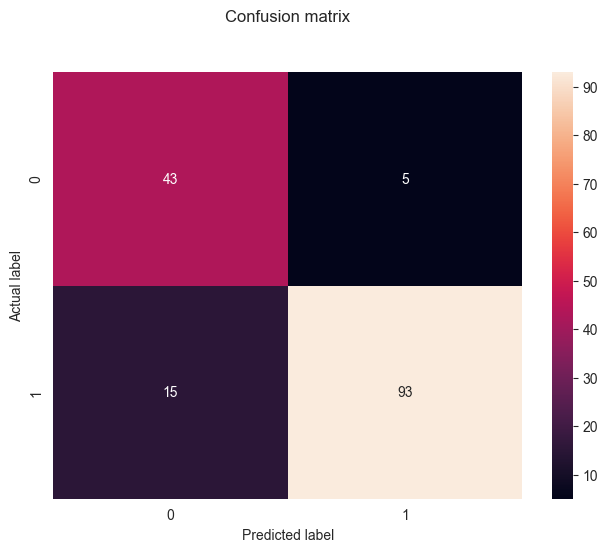

In [113]:
sns.heatmap((cnf_matrix), annot=True, fmt='g')
#axis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [115]:
print("Accuracy:",metrics.accuracy_score(y_test, predict))
print("Precision:",metrics.precision_score(y_test, predict))
print("Recall:",metrics.recall_score(y_test, predict))
print("F1 Score:",metrics.f1_score(y_test,predict))


Accuracy: 0.8717948717948718
Precision: 0.9489795918367347
Recall: 0.8611111111111112
F1 Score: 0.9029126213592233


In [117]:
cross_val_score(
...     logreg, X_test, y_test, cv=12, scoring='f1_macro')

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

array([0.81944444, 0.81944444, 0.90225564, 0.90225564, 0.5751634 ,
       0.91503268, 1.        , 0.78333333, 0.90225564, 1.        ,
       0.90225564, 0.90225564])

We have obtained Accuracy of 92.3% and F1 score of 94.4% for Logistic Regression model

### Prediction using Decision Tree Classifier

In [119]:
conda install py-xgboost

Retrieving notices: ...working... done
Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_2          16 KB
    ca-certificates-2025.9.9   |       hca03da5_0         127 KB
    certifi-2025.8.3           |  py312hca03da5_0         161 KB
    conda-24.11.3              |  py312hca03da5_0         1.2 MB
    libxgboost-3.0.1           |       h313beb8_0         1.8 MB
    openssl-3.0.17             |       h4ee41c1_0         4.3 MB
    py-xgboost-3.0.1           |  py312hca03da5_0         404 KB
    ------------------------------------------------------------
                                           Total:         8.0 MB

The following NEW packages will be INSTALLED:

  _py-xgboo

In [123]:
from xgboost import XGBClassifier

In [125]:
tree = DecisionTreeClassifier()

In [127]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [129]:
predict = tree.predict(X_test)

In [131]:
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       0.79      0.70      0.75        54
           1       0.85      0.90      0.88       102

    accuracy                           0.83       156
   macro avg       0.82      0.80      0.81       156
weighted avg       0.83      0.83      0.83       156



In [133]:
print("Accuracy:",metrics.accuracy_score(y_test, predict))
print("Precision:",metrics.precision_score(y_test, predict))
print("Recall:",metrics.recall_score(y_test, predict))
print("F1 Score:",metrics.f1_score(y_test,predict))


Accuracy: 0.8333333333333334
Precision: 0.9019607843137255
Recall: 0.8518518518518519
F1 Score: 0.8761904761904762


In [135]:
cross_val_score(
...     logreg, X_test, y_test, cv=12, scoring='f1_macro')

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

array([0.81944444, 0.81944444, 0.90225564, 0.90225564, 0.5751634 ,
       0.91503268, 1.        , 0.78333333, 0.90225564, 1.        ,
       0.90225564, 0.90225564])

### Prediction using Random Forest Classifier

In [137]:
random = RandomForestClassifier()

In [139]:
random.fit(X_train,y_train)

RandomForestClassifier()

In [141]:
predict = random.predict(X_test)

In [143]:
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        49
           1       0.94      0.95      0.95       107

    accuracy                           0.93       156
   macro avg       0.92      0.92      0.92       156
weighted avg       0.93      0.93      0.93       156



### Prediction using XGBoost Classifier

In [145]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [147]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [149]:
predictions =  xgb.predict(X_test)

In [151]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        51
           1       0.92      0.94      0.93       105

    accuracy                           0.90       156
   macro avg       0.90      0.88      0.89       156
weighted avg       0.90      0.90      0.90       156



In [153]:
cross_val_score(
...     xgb, X_test, y_test, cv=12, scoring='f1_macro')

array([0.90225564, 0.8375    , 0.90225564, 0.90225564, 0.74509804,
       0.91503268, 0.91503268, 0.78333333, 0.90225564, 0.81944444,
       0.91503268, 0.78333333])

### Prediction using Naive Bayes Model

In [155]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

In [157]:
model = GaussianNB()
model.fit(X_train, y_train)
  
predicted = model.predict(X_test)
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("F1 score for Gaussian Naive Bayes is :",f1_score(y_test, predicted,)*100, "%")

The accuracy of Gaussian Naive Bayes model is :  78.84615384615384 %

F1 score for Gaussian Naive Bayes is : 83.07692307692308 %


In [159]:
model = BernoulliNB()
model.fit(X_train, y_train)
  
predicted = model.predict(X_test)
  
print("The accuracy of Bernoulli Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("F1 score for Bernoulli Naive Bayes is :",f1_score(y_test, predicted,)*100, "%")

The accuracy of Bernoulli Naive Bayes model is :  82.6923076923077 %

F1 score for Bernoulli Naive Bayes is : 86.29441624365482 %


### Best Model
Logistic Regression seems to have highest accuracy compared to all other models

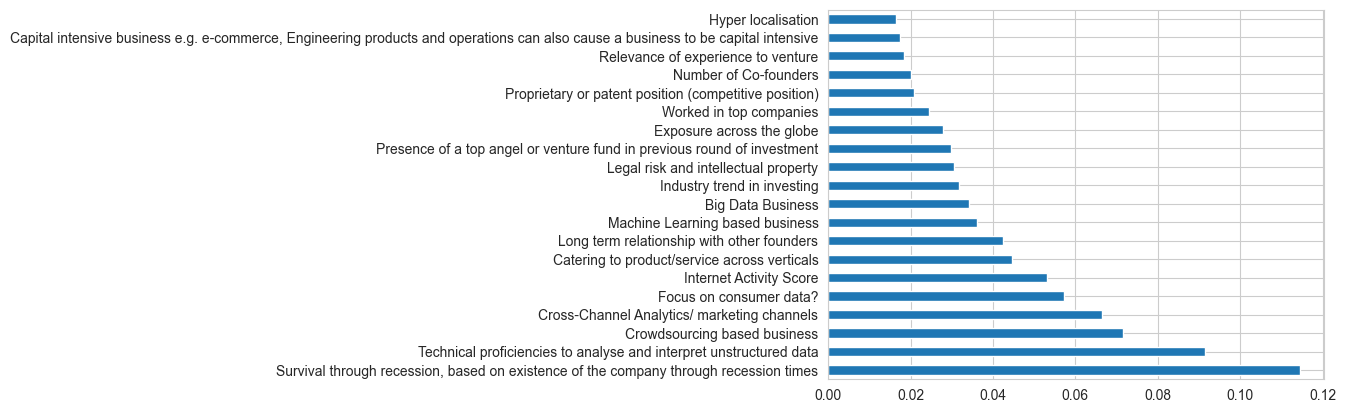

In [161]:
feat_importances = pd.Series(xgb.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [163]:
cat = data_new.select_dtypes(include = 'object')

In [165]:
cat

,Dependent-Company Status,year of founding,Age of company in years,Focus functions of company,Country of company,Continent of company,Number of Investors in Seed,Number of Investors in Angel and or VC,Team size all employees,Number of of repeat investors,Number of Sales Support material,Average size of companies worked for in the past,Product or service company?,Focus on private or public data?,Focus on structured or unstructured data,Cloud or platform based serive/product?,Local or global player,Linear or Non-linear business model,Number of of Partners of company,Online or offline venture - physical location based business or online venture?,B2C or B2B venture?,Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about?,Average Years of experience for founder and co founder,Breadth of experience across verticals,Highest education,Years of education,Degree from a Tier 1 or Tier 2 university?,Renowned in professional circle,Experience in selling and building products,Experience in Fortune 100 organizations,Experience in Fortune 500 organizations,Experience in Fortune 1000 organizations,Top management similarity,Number of Recognitions for Founders and Co-founders,Number of of Research publications,Skills score,Team Composition score,Dificulty of Obtaining Work force,Time to market service or product,Employee benefits and salary structures,Client Reputation,google page rank of company website,Disruptiveness of technology,Number of Direct competitors,Employees per year of company existence,Last round of funding received (in milionUSD),Time to 1st investment (in months),"Avg time to investment - average across all rounds, measured from previous investment",Percent_skill_Entrepreneurship,Percent_skill_Operations,Percent_skill_Engineering,Percent_skill_Marketing,Percent_skill_Leadership,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
Company_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Company1,Success,0,0,operation,United States,North America,2,0,15,4,Nothing,Small,Service,Private,Both,Platform,Global,Linear,0,Online,B2C,High,High,Low,Masters,21,Tier_1,500,Medium,0,0,0,0,0,0,0,Low,Low,High,0,0,9626884,Low,0,1.5,0.45,0,11.56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Company2,Success,2011,3,"Marketing, sales",United States,North America,5,0,20,0,medium,Large,Product,Public,Both,Platform,Local,Non-Linear,Few,Online,B2C,Low,High,High,Masters,21,Tier_1,500,High,0,0,0,Medium,13,0,34,High,Medium,Low,0,Medium,1067034,Medium,0,6.666666667,5,10,9,15.88235294,11.76470588,15,12.94117647,0,8.823529412,21.76470588,10.88235294,2.941176471,0,0,0,0,0,8
Company3,Success,2011,3,operations,United States,North America,15,0,10,0,low,Medium,Both,Private,Both,cloud,Local,Non-Linear,Few,Online,B2B,Low,Medium,Low,Bachelors,18,Tier_2,500,High,0,0,1,Medium,18,0,36,High,Medium,Low,0,Low,71391,Medium,0,3.333333333,2.35,2,7.344444444,9.401709402,0,57.47863248,0,0,3.846153846,17.09401709,9.401709402,0,2.777777778,0,0,0,0,9
Company4,Success,2009,5,Marketing & Sales,United States,North America,6,0,50,0,low,Large,Product,Public,Structured,Platform,Local,Non-Linear,Few,Online,B2C,Medium,Medium,Low,Bachelors,18,Tier_2,0,Low,0,0,0,Medium,2,0,15.5,Medium,Medium,Low,Good,Low,11847,Medium,2,10,10.25,1,8.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
Company5,Success,2010,4,Marketing & Sales,United States,North America,7,0,40,0,high,Small,Product,Public,Both,Platform,Local,Non-Linear,Few,Online,B2B,Low,High,Medium,Bachelors,18,0,500,High,0,0,0,Low,5,Few,23,Medium,Medium,Low,Bad,Low,201814,Medium,0,10,5.5,13,9.822222222,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [169]:
cat['years_fund'] = pd.to_numeric(cat['year of founding'])
cat['age'] = pd.to_numeric(cat['Age of company in years'])
cat['numbers_emploees'] =pd.to_numeric(cat['Team size all employees'])
important_categorical_additional_integer = cat[['years_fund', 'age', 'numbers_emploees', 'Focus functions of company', 'Highest education']]

In [171]:
final =   pd.concat([important_categorical_additional_integer, integers ], axis=1, sort=False)

In [173]:
end = pd.get_dummies(final)

In [175]:
X = end.drop(['success_fail'], axis =1 )

In [177]:
y = end['success_fail']

In [179]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [181]:
xgb =XGBClassifier()

In [183]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [189]:
predictions =  xgb.predict(X_test)

In [191]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82        52
           1       0.90      0.93      0.92       104

    accuracy                           0.88       156
   macro avg       0.88      0.86      0.87       156
weighted avg       0.88      0.88      0.88       156



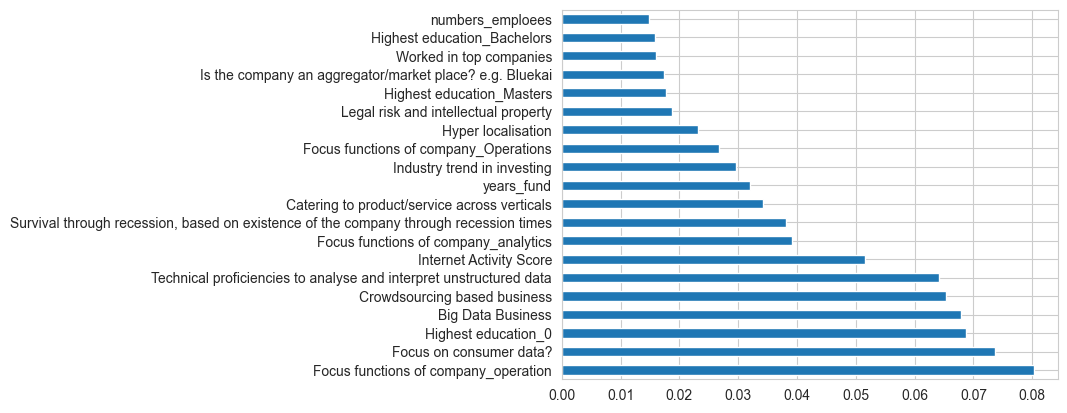

In [193]:
feat_importances = pd.Series(xgb.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

From the above plot we can observe that Focus functions of company_operation and Highest education are the most important features to predict the Success or Failure rate of the startup